Import section, all imports should go to the below cell

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord

Reading in the data and variables

In [31]:
# reading in simulation data about the LMC cdm wake
stars = np.load('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/star_particles_pos_5e8.npy')
starsdf = pd.DataFrame(stars)
starsdf = starsdf.rename(columns={0:"x", 1:"y", 2:"z"})

# to remove outliers in the z axis with np.where, I first need to convert the column to a numeric type with pd.to_numeric.
# z axis is chosen specifically because, if the data is plotted in the x-z axis, the relevant data is clearly bound between -20 and 20 kpc.
# This 
starsdf["z"] = pd.to_numeric(starsdf["z"], errors="coerce")
starsdf['z'] = np.where((starsdf['z'] > 20) | (starsdf['z'] < -20), np.nan, starsdf['z'])
starsdf = starsdf.dropna(subset=["z"])

x_s = starsdf['x']
y_s = starsdf['y']
z_s = starsdf['z']

bins = (35, 35)

Reading in LMC orbit data

In [32]:
# Name of article where this data originates from: "Orbits of massive satellite galaxies - I. A close look at the Large Magellanic Cloud and a new orbital history for M33"
# DOI: 10.1093/mnras/stw2616

# This data has been taken from the article mentioned above. The data is specifically taken from Figure 2a. The first two plots in the first row which depicts the LMC orbit
# around the MW. 

# This uses data with a MW mass of 10^12 M_solar
lmc_orbit = pd.read_csv('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/LMC_magenta_orbit_MW_Mass_10_12.csv')

# This uses data with a MW mass of 1.5x10^12 M_solar
lmc_orbit_15 = pd.read_csv('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/LMC_magenta_orbit_MW_Mass_1.5x10_12.csv')

Visualization of the x and y plane to bring out the density areas in the simulation. 

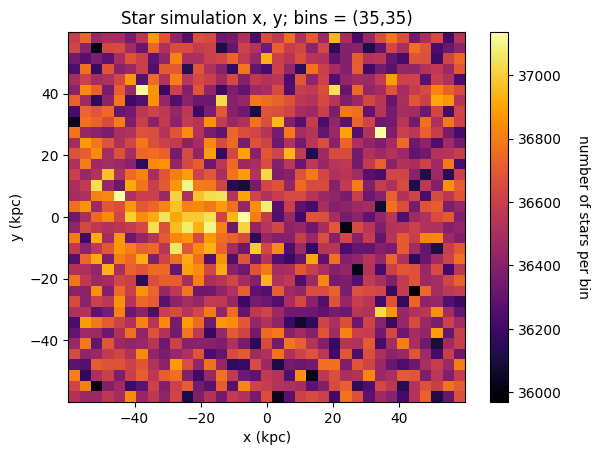

In [33]:
hist = plt.hist2d(x_s,y_s, bins=bins, cmap = "inferno")
plt.title("Star simulation x, y; bins = (35,35)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
cmap = plt.colorbar()
cmap.set_label('number of stars per bin', rotation=270, labelpad=20)

Smoothing of the above data

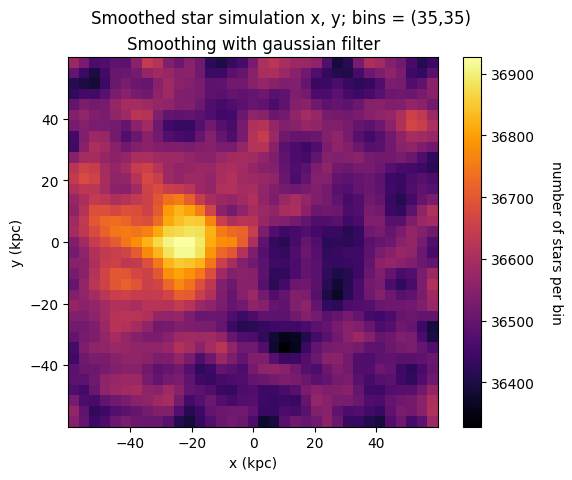

In [34]:
##ceating np histogram
hist_s, xedges, yedges = np.histogram2d(x_s, y_s, bins=(35,35))
#hist_s, xedges, yedges = np.histogram2d(x_s, y_s, bins=(65,65))

##smoothing the histogram with gauss filter
hist_smoothed = gaussian_filter(hist_s, sigma=1)

##plotting the smoothed histogram
plt.imshow(hist_smoothed.T, origin='lower', cmap="inferno", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.suptitle("Smoothed star simulation x, y; bins = (35,35)")
plt.title("Smoothing with gaussian filter")

#plt.title("Star simulation x, y; bins = (65,65)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
cmap = plt.colorbar()
cmap.set_label('number of stars per bin', rotation=270, labelpad=20)


Calculating and visualizing overdensity

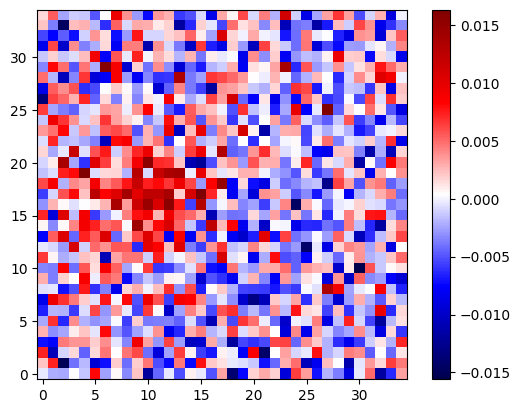

In [35]:
fig,ax = plt.subplots()
OD_hist = np.histogram2d(x_s, y_s, (35, 35))[0]
overdensity =OD_hist/np.mean(OD_hist)-1
im = ax.imshow(overdensity.T, origin='lower', cmap = "seismic")
fig.colorbar(im, ax=ax)


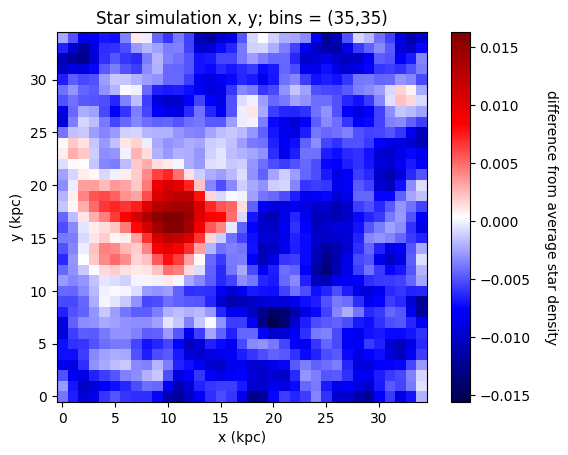

In [36]:
fig,ax = plt.subplots()
pre_OD, xedges, yedges = np.histogram2d(x_s, y_s, (35, 35))
OD = (pre_OD / np.mean(pre_OD)-1)
im = ax.imshow(overdensity.T, origin='lower', cmap = "seismic")
c = plt.colorbar(im, ax=ax)
plt.title("Star simulation x, y; bins = (35,35)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
c.set_label('difference from average star density', rotation=270, labelpad=20)

im_smoothed = gaussian_filter(im, sigma=1)
plt.imshow(hist_smoothed.T, origin='lower', cmap="seismic")

In [37]:
hist_smoothed1 = gaussian_filter(hist_s, sigma=3)
extent = [-60, 60, -60, 60]

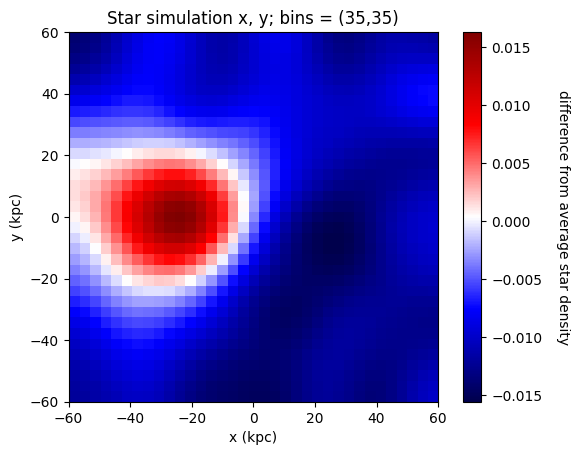

In [38]:
fig,ax = plt.subplots()
pre_OD, xedges, yedges = np.histogram2d(x_s, y_s, (35, 35))
OD = (pre_OD / np.mean(pre_OD)-1)
im = ax.imshow(overdensity.T, origin='lower', cmap = "seismic")
c = plt.colorbar(im, ax=ax)
plt.title("Star simulation x, y; bins = (35,35)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
c.set_label('difference from average star density', rotation=270, labelpad=20)

im_smoothed = gaussian_filter(im, sigma=1)
plt.imshow(hist_smoothed1.T, origin='lower', extent = extent,  cmap="seismic")

Mollweide projection

Note to self: A mollweide projection takes in cylindrical/spherical coordinates and projects it onto a 2D plane. Cartesian coordinates need to be transformed first into a compatible system.

In [46]:
x = lmc_orbit['x']
y = lmc_orbit['y']
z = lmc_orbit['z']

r = np.sqrt(x**2 + y**2 + z**2)
l = np.arctan2(y, x)
b = np.arcsin(z/r)

l = np.radians(l)
b = np.radians(b)



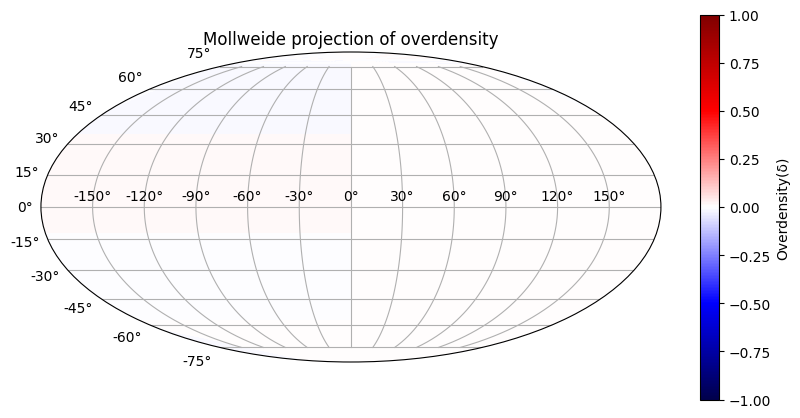

In [39]:
x_grid, y_grid = np.meshgrid(xedges[:-1], yedges[:-1])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot (111, projection = "mollweide")

im = ax.pcolormesh(x_grid, y_grid, OD.T, cmap='seismic', shading = 'auto', vmin = -1, vmax = 1)

plt.colorbar(im, label = 'Overdensity(δ)')

plt.title("Mollweide projection of overdensity")
plt.grid(True)

plt.show()

In [ ]:
lmc_orbit


,x,y,z
0,0,-27.356879,-44.255011
1,0,-18.138355,-49.715263
2,0,-8.925209,-54.103564
3,0,0.283567,-57.620904
4,0,9.490327,-60.736262
...,...,...,...
63,0,549.672915,106.863324
64,0,557.569179,115.141914
65,0,564.631518,123.095011
66,0,571.276001,131.063462
